# 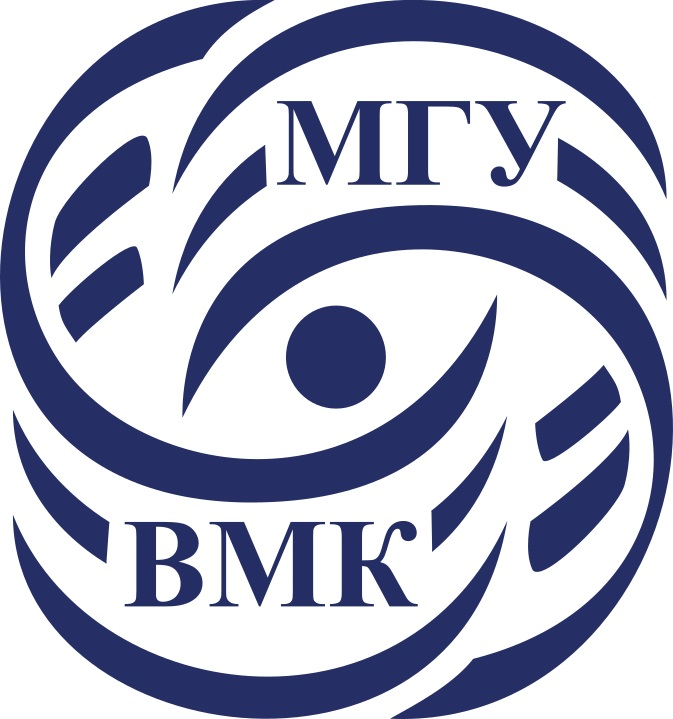

# Машинное обучение. ВМК МГУ

# Практическое задание 3: Линейные модели: регрессия

## Уровень: <font color='MediumSeaGreen'>**Исследовательский (Research)**</font>

# О формате сдачи

🔷 **<font color='plum'>При решении ноутбука используйте данный шаблон</font>**

    ✅ Можно добавлять новые ячейки любых типов
    ❌ Не нужно удалять текстовые ячейки c разметкой частей ноутбука и формулировками заданий


🔷 **<font color='plum'>При оценивании задач учитывается код</font>**

    ✅ Задания, в которых необходим код, обычно помечаются фразами "Your code here"/"Ваш код" и аналогичными
    ❌ Ответы на вопросы без сопутствующего кода оцениваются в 0 баллов
    ❌ Наличе работоспособного кода в ноутбуке, если на сказано иного, обязательно

🔷 **<font color='plum'>При оценивании задач учитываются выводы</font>**

    ✅ Задания, в которых необходимы выводы, обычно помечаются фразами Вывод"/"Ответ на вопрос"/"Ваш текст" и аналогичными
    ✅ Обычно выводы подразумевают под собой текстовый ответ (можно писать markdown, latex).
    ✅ Сопутствующие изображения, графики, таблички - приветствуются!
    ❌ При отсутствии выводов задание не засчитается на полный балл

-----------
<font color="white" style="opacity:0.2025"></font>







Цель данного задания:

* Узнать, что такое переобучение и как с ним бороться в линейных моделях;
* Понять, чем отличаются разные регуляризаторы;
* Научиться решать задачу регрессии линейными моделями.
-------
<font color=DarkOrange>**Примерное время выполнения (execution time/время выполнения, если нажать run all) всех ячеек ноутбука при правильной реализации: 7 минут </font>**

# Подготовка рабочей среды

Сначала установим нужные нам версии библиотек. Мы гарантируем, что в данных версиях задание будет корректно отрабатывать.

После установки нужных версий, **возможно,** нужно перезагрузить среду (runtime), но скорее всего вам это не понадобится


На скачивание файла и установку понадобится не более 5 минут.

<font color='OrangeRed'>**Важно!**</font>

Устанавливать нужные версии нужно каждый раз, когда создается новый рантайм. Например, если вы 2 часа подряд делаете это задание, то подготовить библиотеки достаточно 1 раз. Но если вы, например, начали в понедельник, затем закрыли/выключили ноутбук, то при продолжении в среду, вам нужно будет запустить рантайм заново и следовательно заново установить библиотеки.

<font color='OrangeRed'>**Важно!**</font>
Если вы предпочитаете делать практические задания на своем личном ноутбуке, то проверьте, что вы установили рабочее окружение в [соответствии с гайдом](https://github.com/MSU-ML-COURSE/ML-COURSE-24-25/blob/main/tutorials/%D0%A2%D1%83%D1%82%D0%BE%D1%80%D0%B8%D0%B0%D0%BB%20%D0%BF%D0%BE%20%D1%83%D1%81%D1%82%D0%B0%D0%BD%D0%BE%D0%B2%D0%BA%D0%B5%20%D1%80%D0%B0%D0%B1%D0%BE%D1%87%D0%B5%D0%B3%D0%BE%20%D0%BE%D0%BA%D1%80%D1%83%D0%B6%D0%B5%D0%BD%D0%B8%D1%8F%20%D0%B2%20Python%20%D0%B4%D0%BB%D1%8F%20%D1%80%D0%B5%D1%88%D0%B5%D0%BD%D0%B8%D1%8F%20%D0%B7%D0%B0%D0%B4%D0%B0%D1%87%20(2).pdf)


In [9]:
! curl https://raw.githubusercontent.com/MSU-ML-COURSE/ML-COURSE-25-26/refs/heads/master/requirements/requirements.txt -o ./requirements_2025_26_for_colab_small.txt
! pip install -q -r ./requirements_2025_26_for_colab_small.txt

  % Total    % Received % Xferd  Average Speed  Time    Time    Time   Current
                                 Dload  Upload  Total   Spent   Left   Speed
100    360 100    360   0      0   1291      0                              0


Проверим версию библиотеки:

In [1]:
import catboost
assert(catboost.__version__ == '1.2.8')

Теперь можно приступать к выполнению задания! :)

-----------
<font color="white" style="opacity:0.2025"></font>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")
sns.set(style="darkgrid")
%matplotlib inline

## Линейная регрессия и регуляризация

Напомним, что линейная регрессия — это модель следующего вида: $$a(x) = \langle w, x \rangle + b$$ где $w \in \mathbb{R}^d$, $b \in \mathbb{R}$. Обучить линейную регрессию — значит найти $w$ и $b$.

В модели линейной регрессии с $l_2$ регуляризацией мы оптимизируем следующий функционал:

$\frac{1}{N} \cdot ∑_{i=1}^M (w_1 \cdot x_{i1} + \dots w_n \cdot x_{in} + b - y_i)^2 + \frac{\alpha}{2} \cdot \left( w_1^2 + \dots + w_n^2 \right) \rightarrow \min_{w_1, \dots, w_n, b}$

В модели линейной регрессии с $l_1$ регуляризацией мы оптимизируем следующий функционал:

$\frac{1}{N} \cdot ∑_{i=1}^M (w_1 \cdot x_{i1} + \dots w_n \cdot x_{in} + b - y_i)^2 + \alpha \cdot \left( |w_1| + \dots + |w_n| \right) \rightarrow \min_{w_1, \dots, w_n, b}$

### <font color='DarkOrange'>**Задание 1 [1 балл]**</font>

Почему при обучении линейных моделей, коэффициент $b$ не регуляризуется? Дайте ответ с опорой на лекции. Возможно вам также поможет картика из базовой части

<font color='MediumOrchid'>**Ваши выводы тут:**</font>

Если бы мы регуляризовали коэффициент $b$, модель стала бы чувствительной к сдвигу целевой переменной. А она должна сохранять инвариантность относительно нее. Также с геометрической точки зрения регуляризация $b$ означала бы "сдвиг" всей гиперплоскости, что не имеет смысла с точки зрения борьбы с переобучением.

-----
<font color="white" style="opacity:0.2025"></font>

Рассмотрим модель линейной регрессии с $l_2$ регуляризацией. В sklearn эта модель реализована посредством класса Ridge. В нём есть методы fit и predict. Первый принимает на вход обучающую выборку и вектор целевых переменных и обучает модель, второй, будучи вызванным после обучения модели, возвращает предсказание на выборке.

Сгенерируем случайные данные. Пусть $x$ будет обычным числом из равномерного распределения, а $𝑦=0.5 \cdot x + 0.1$ &mdash; целевая переменная. При этом наблюдаем мы $\overline{y} = y + \varepsilon,~\varepsilon \sim N(0, 0.01)$. Добавим в данные к переменной $x$ её же умноженную на $3$. То есть, теперь у нас два признака $x_1$ и $x_2 = 3 \cdot x_1$.

Поскольку  $y = c \cdot 0.5 \cdot x_1 + \frac{1 - c}{6} \cdot x_2 + 0.1$, где $c$ любое сколь угодно большое вещественное число. То, как мы могли убедиться в базовой части, без регуляризации есть риск выучить очень большие веса.

Посмотрим, как меняется значения весов, в зависимости от значения коэффициента регуляризации.

In [3]:
from sklearn.linear_model import Ridge

In [4]:
# Фиксация random seed для воспроизводимости
np.random.seed(1)

# Создание простых одномерных данных
X = np.random.uniform(0, 1, 100)  # 100 случайных чисел от 0 до 1
Y = X * 0.5 + 0.1 + np.random.randn(100) * 0.1  # Линейная зависимость с шумом

# Создание данных с мультиколлинеарностью
X3 = np.hstack((X[:, None], 3 * X[:, None]))  # Второй признак в 3 раза больше первого
Y3 = X3[:, 0] * 0.5 + 0.1 + np.random.randn(100) * 0.1  # Та же зависимость

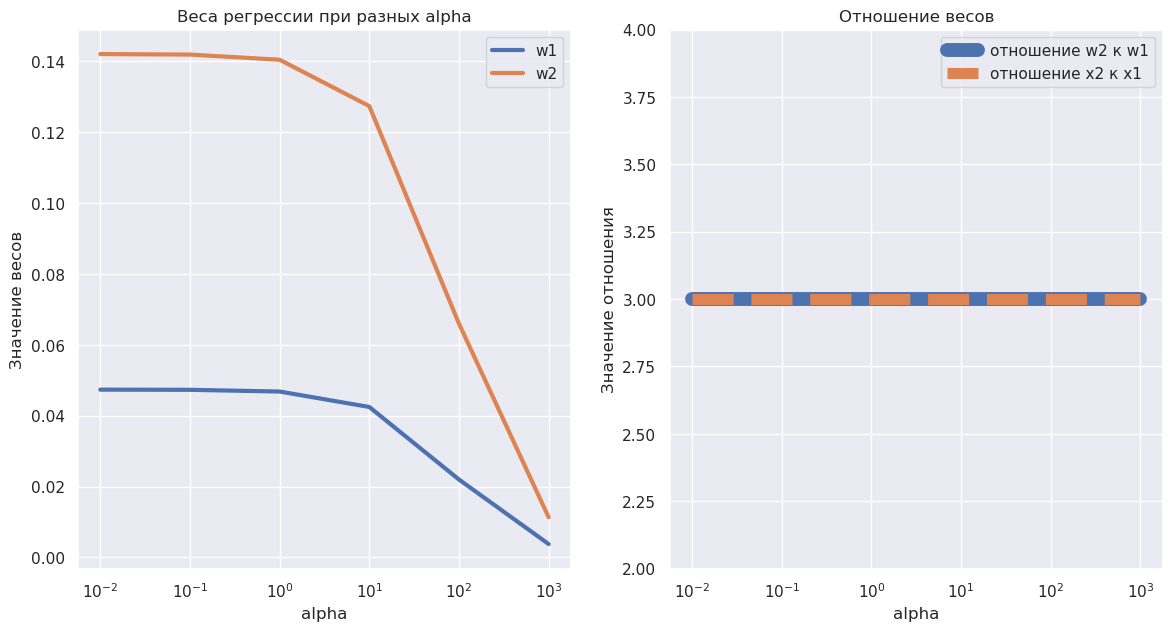

In [5]:
# Инициализация списков для хранения коэффициентов
w1 = []
w2 = []

# Диапазон параметров регуляризации alpha
alphas = [0.01, 0.1, 1, 10, 100, 1000]

# Обучение Ridge регрессии для каждого alpha
for alpha in alphas:
    reg = Ridge(alpha=alpha)
    reg.fit(X3, Y3)  # X3 имеет мультиколлинеарность (x2 = 3*x1)z   
    w1.append(reg.coef_[0])  # Коэффициент для первого признака
    w2.append(reg.coef_[1])  # Коэффициент для второго признака

# Преобразование в numpy массивы
w1 = np.array(w1)
w2 = np.array(w2)

# Создание визуализации
fig, axs = plt.subplots(figsize=(14, 7), ncols=2)

# Первый график: значения коэффициентов
axs[0].plot(alphas, w1, label="w1", linewidth=3)
axs[0].plot(alphas, w2, label="w2", linewidth=3)
axs[0].set_xscale("log")  # Логарифмическая шкала для alpha
axs[0].set_title("Веса регрессии при разных alpha")
axs[0].set_xlabel("alpha")
axs[0].set_ylabel("Значение весов")
axs[0].legend()

# Второй график: отношение коэффициентов
axs[1].plot(alphas, w2 / w1, label="отношение w2 к w1", linewidth=10)
axs[1].plot([0.01, 1000], [3, 3], label="отношение x2 к x1", linestyle="--", linewidth=8)
axs[1].set_xscale("log")
axs[1].set_ylim(2, 4)
axs[1].set_xlabel("alpha")
axs[1].set_ylabel("Значение отношения")
axs[1].set_title("Отношение весов")
axs[1].legend()

plt.show()

### <font color='DarkOrange'>**Задание 2 [2 баллa]**</font>

Как думаете, почему отношение между весами постоянно? (подсказка, необходимо выписать функцию потерь и посчитать производные по весам)

<font color='MediumOrchid'>**Ваши выводы тут:**</font>

Для данных с двумя признаками $x_1$ и $x_2 = 3x_1$

Функция потерь с L2-регуляризацией:
$L(w_1, w_2, b) = \sum_{i=1}^n (w_1x_{1i} + w_2x_{2i} + b - y_i)^2 + \alpha(w_1^2 + w_2^2)$

Но поскольку $x_2 = 3x_1$, подставим:
$L(w_1, w_2, b) = \sum_{i=1}^n ((w_1 + 3w_2)x_{1i} + b - y_i)^2 + \alpha(w_1^2 + w_2^2)$

## Условия оптимальности

Возьмём частные производные и приравняем к нулю:

$\frac{\partial L}{\partial w_1} = 2\sum_{i=1}^n ((w_1 + 3w_2)x_{1i} + b - y_i)x_{1i} + 2\alpha w_1 = 0$

$\frac{\partial L}{\partial w_2} = 6\sum_{i=1}^n ((w_1 + 3w_2)x_{1i} + b - y_i)x_{1i} + 2\alpha w_2 = 0$

Перенесем $2\alpha w_1$ и $2\alpha w_2$ вправо

$2\sum_{i=1}^n ((w_1 + 3w_2)x_{1i} + b - y_i)x_{1i} = - 2\alpha w_1$

$6\sum_{i=1}^n ((w_1 + 3w_2)x_{1i} + b - y_i)x_{1i} = - 2\alpha w_2$
## Почему отношение весов постоянно

Поделим второе уравнение на первое:

$\frac{6\sum_{i=1}^n ((w_1 + 3w_2)x_{1i} + b - y_i)x_{1i}}{2\sum_{i=1}^n ((w_1 + 3w_2)x_{1i} + b - y_i)x_{1i}} = \frac{w_2}{w_1}$

Упростим:

$3 = \frac{w_2}{w_1}$

**Таким образом, оптимальные веса всегда удовлетворяют соотношению:**
$\frac{w_2}{w_1} = 3$


Это означает, что независимо от значения коэффициента регуляризации $\alpha$, оптимальные веса будут лежать на прямой $w_2 = 3w_1$, меняя лишь свою общую величину, но не соотношение.

-----
<font color="white" style="opacity:0.2025"></font>

Заметим, что при $l_2$ регуляризации в данном примере веса получились пропорциональны значениям признаков. При этом, мы знаем, что оба признака взаимно однозначны, и прогноз можно делать только по одному из них. Для этого придумана $l_1$ регуляризация. В билиотеке sklearn линейная регрессия с $l_1$ регуляризацией реализована в классе Lasso

### <font color='DarkOrange'>**Задание 3 [2 баллa]**</font>

Почему в нашем примере $l_1$ регуляризация приведёт к разреживанию весов? (подсказка, нужно опять подсчитать производную, но обратите внимание на дифференцируемость модуля).

<font color='MediumOrchid'>**Ваши выводы тут:**</font>

Для данных с $x_2 = 3x_1$ Функция потерь для Lasso:

$L(w_1, w_2, b) = \sum_{i=1}^n (y_i - (w_1 + 3w_2)x_{1i} - b)^2 + \alpha(|w_1| + |w_2|)$

Если мы попробуем посчитать частные производные этой функции, то столкнемся с **проблемой дифференцируемости**



Мы знаем, что функция $|w|$ не дифференцируема в точке \(w = 0\)

И в условиях оптимальности теперь надо считать **субградиент**:

$\frac{\partial L}{\partial w_1} \in -2\sum_{i=1}^n (y_i - (w_1 + 3w_2)x_{1i} - b)x_{1i} + \alpha \cdot \text{sign}(w_1)$

$\frac{\partial L}{\partial w_2} \in -2\sum_{i=1}^n (y_i - (w_1 + 3w_2)x_{1i} - b)x_{1i} + \alpha \cdot \text{sign}(w_2)$

где $\text{sign}(w) =
\begin{cases}
1 & \text{если } w > 0 \\
-1 & \text{если } w < 0 \\
[-1, 1] & \text{если } w = 0
\end{cases}$\
\
В оптимальной точке для каждого веса $w_j$ должно выполняться:

$2\sum_{i=1}^n (y_i - (w_1 + 3w_2)x_{1i} - b)x_{1i} \in \alpha \cdot \text{sign}(w_j)$

И если величина градиента по данным меньше, чем $\alpha$, то оптимальное решение - **обнулить вес**!

Для $w_j = 0$ условие оптимальности:
$\left|2\sum_{i=1}^n (y_i - (w_1 + 3w_2)x_{1i} - b)x_{1i}\right| \leq \alpha$


У нас $x_2 = 3x_1$, и модель может достичь одинакового предсказания разными способами:
- \(w_1 = 0.5, w_2 = 0\)
- \(w_1 = 0, w_2 = 0.5/3\)
- \(w_1 = 0.2, w_2 = 0.1\)

**L1-регуляризация выберет решение с наименьшей L1-нормой**, то есть то, где один из весов будет нулевым.

Отсюда и возникнет разреживание весов

-----

Добавим $l_1$ регуляризацию и посмотрим, как меняется значения весов, в зависимости от значения коэффициента регуляризации.

In [6]:
from sklearn.linear_model import Lasso

In [7]:
# Lasso с сильной регуляризацией
reg = Lasso(alpha=1., max_iter=1000, tol=1e-4)
reg.fit(X3, Y3)
print("Веса, при alpha = 1.")
print("w1:", reg.coef_[0], "\tw2:", reg.coef_[1])
print()

# Постепенное уменьшение alpha (ослабление регуляризации)
reg = Lasso(alpha=0.1, max_iter=1000, tol=1e-4)
reg.fit(X3, Y3)
print("Веса, при alpha = 0.1")
print("w1:", reg.coef_[0], "\tw2:", reg.coef_[1])
print()

reg = Lasso(alpha=0.01, max_iter=1000, tol=1e-4)
reg.fit(X3, Y3)
print("Веса, при alpha = 0.01")
print("w1:", reg.coef_[0], "\tw2:", reg.coef_[1])
print()

reg = Lasso(alpha=0.001, max_iter=1000, tol=1e-4)
reg.fit(X3, Y3)
print("Веса, при alpha = 0.001")
print("w1:", reg.coef_[0], "\tw2:", reg.coef_[1])
print()

reg = Lasso(alpha=0.0001, max_iter=1000, tol=1e-4)
reg.fit(X3, Y3)
print("Веса, при alpha = 0.0001")
print("w1:", reg.coef_[0], "\tw2:", reg.coef_[1])
print()

# Lasso с очень слабой регуляризацией
reg = Lasso(alpha=0.00001, max_iter=1000, tol=1e-4)
reg.fit(X3, Y3)
print("Веса, при alpha = 0.00001")
print("w1:", reg.coef_[0], "\tw2:", reg.coef_[1])
print()

Веса, при alpha = 1.
w1: 0.0 	w2: 0.0

Веса, при alpha = 0.1
w1: 0.0 	w2: 0.029684463509327023

Веса, при alpha = 0.01
w1: 0.0 	w2: 0.14506160917248503

Веса, при alpha = 0.001
w1: 0.0 	w2: 0.1565993237388008

Веса, при alpha = 0.0001
w1: 0.0 	w2: 0.1577530951954324

Веса, при alpha = 0.00001
w1: 0.3966873199145481 	w2: 0.025639365702912847



### <font color='DarkOrange'>**Задание 4 [2 баллa]**</font>

Почему в итоге при $\alpha = 0.00001$ получились веса не равные нулю?

<font color='LightSteelBlue'>**Подсказка**</font>

 Обратите внимание на то, каким странным получился вес $w_2$

<font color='MediumOrchid'>**Ваши выводы тут:**</font>

При $\alpha = 0.00001$ регуляризация начинает практически отсутствовать. Модель стремится минимизировать ошибку предсказания, а не штраф за большие веса.

-----

В предущих блоках мы использовали модельные примеры, в которых $y$ зависел от $x$ линейно. Но так бывает далеко не всегда.

### <font color='DarkOrange'>**Задание 5 [1 баллa]**</font>

 Придумайте, сгенерируйте и визуализируйте пример, в котором линейная регрессия будет плохо классифицировать данные.

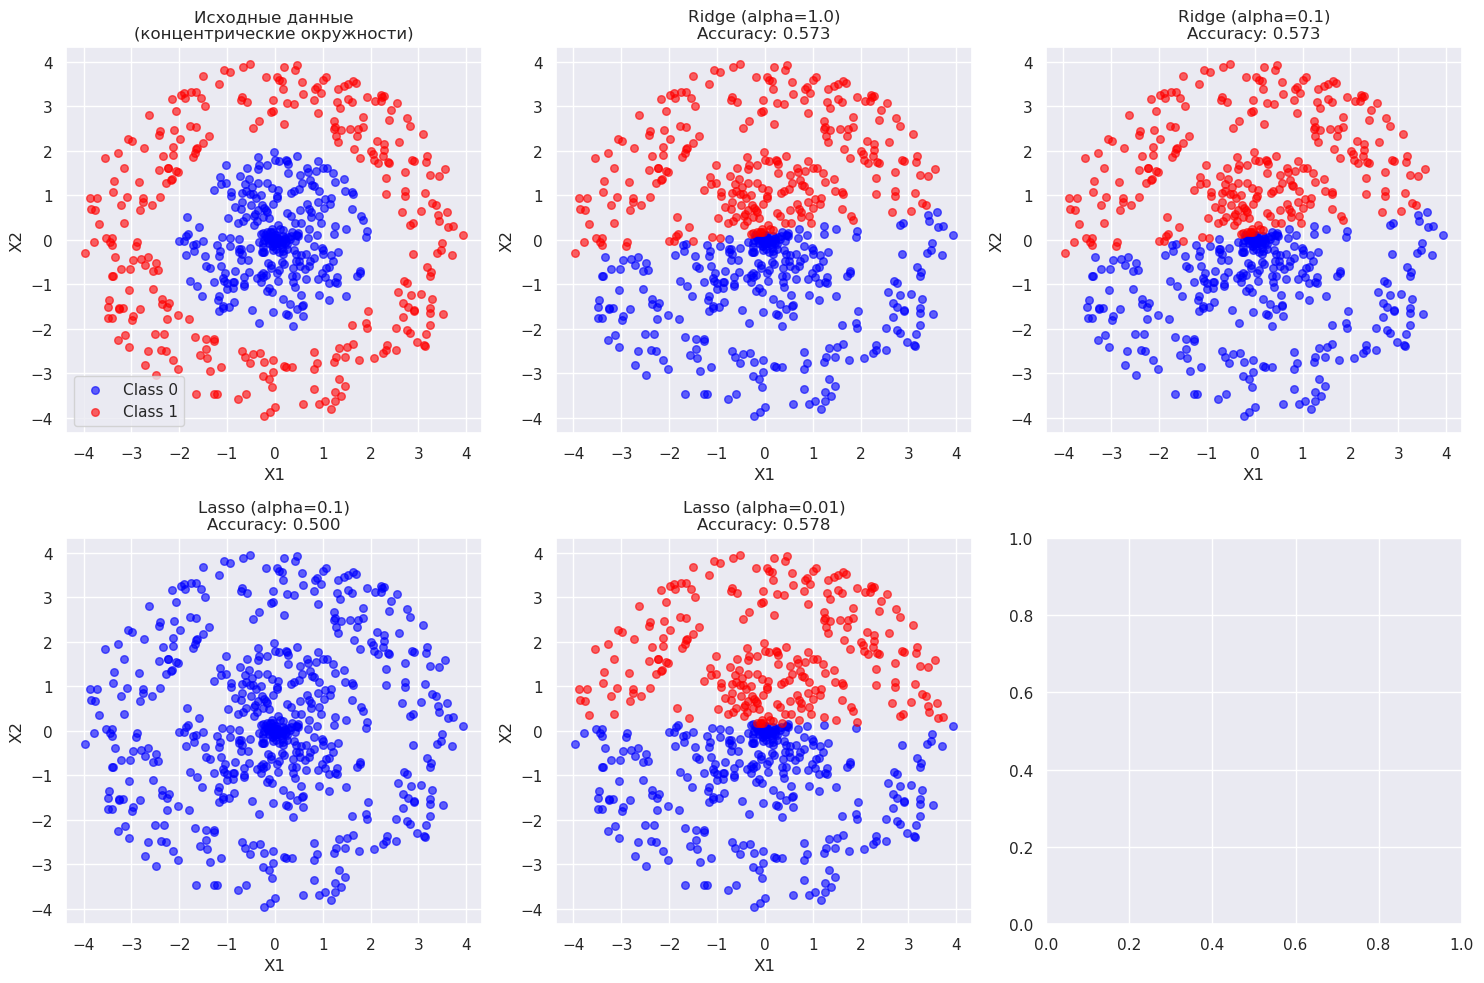

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, Lasso, LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Создаем нелинейно разделимые данные (концентрические окружности)
np.random.seed(42)
n_samples = 300

# Класс 0: внутренний круг
theta = np.random.uniform(0, 2*np.pi, n_samples)
r = np.random.uniform(0, 2, n_samples)
x1_0 = r * np.cos(theta)
x2_0 = r * np.sin(theta)
y_0 = np.zeros(n_samples)

# Класс 1: внешнее кольцо
theta = np.random.uniform(0, 2*np.pi, n_samples)
r = np.random.uniform(2.5, 4, n_samples)
x1_1 = r * np.cos(theta)
x2_1 = r * np.sin(theta)
y_1 = np.ones(n_samples)

# Объединяем данные
X = np.vstack([np.column_stack([x1_0, x2_0]), np.column_stack([x1_1, x2_1])])
y = np.hstack([y_0, y_1])

# Масштабируем данные (важно для регуляризации)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Обучаем модели
models = {
    'Ridge (alpha=1.0)': Ridge(alpha=1.0),
    'Ridge (alpha=0.1)': Ridge(alpha=0.1),
    'Lasso (alpha=0.1)': Lasso(alpha=0.1, max_iter=10000),
    'Lasso (alpha=0.01)': Lasso(alpha=0.01, max_iter=10000)
}

# Визуализация
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

# Исходные данные
axes[0].scatter(X[y==0, 0], X[y==0, 1], c='blue', alpha=0.6, label='Class 0', s=30)
axes[0].scatter(X[y==1, 0], X[y==1, 1], c='red', alpha=0.6, label='Class 1', s=30)
axes[0].set_title('Исходные данные\n(концентрические окружности)')
axes[0].legend()
axes[0].set_xlabel('X1')
axes[0].set_ylabel('X2')

# Предсказания моделей
for i, (name, model) in enumerate(models.items(), 1):
    model.fit(X_scaled, y)
    y_pred_raw = model.predict(X_scaled)
    y_pred = (y_pred_raw > 0.5).astype(int)
    y_prob = y_pred_raw

    accuracy = accuracy_score(y, y_pred)

    # Визуализируем предсказания
    axes[i].scatter(X[y_pred==0, 0], X[y_pred==0, 1], c='blue', alpha=0.6, s=30)
    axes[i].scatter(X[y_pred==1, 0], X[y_pred==1, 1], c='red', alpha=0.6, s=30)
    axes[i].set_title(f'{name}\nAccuracy: {accuracy:.3f}')
    axes[i].set_xlabel('X1')
    axes[i].set_ylabel('X2')

plt.tight_layout()
plt.show()

### <font color='DarkOrange'>**Задание 6 [2 баллa]**</font>

Приведите искусственный пример (можно даже очень неправдоподобный), когда линейная регрессия с $l_2$ регуляризацией гарантированно занулит какой-нибудь признак? Покажите (теоретически или программно), что признак действительно зануляется


Дисперсии признаков:
x1: 0.816522
x2: 0.000001
x3: 0.000000

Коэффициенты при разных alpha:
alpha=   0.0: w1=  2.023, w2= -0.099940, w3=  0.001771
alpha=   0.0: w1=  2.023, w2= -0.011040, w3=  0.001766
alpha=   0.1: w1=  2.020, w2= -0.001373, w3=  0.001720
alpha=   1.0: w1=  1.998, w2= -0.000395, w3=  0.001262
alpha=  10.0: w1=  1.802, w2= -0.000269, w3= -0.002801
alpha= 100.0: w1=  0.909, w2= -0.000131, w3= -0.020530
alpha=1000.0: w1=  0.153, w2= -0.000022, w3= -0.026471


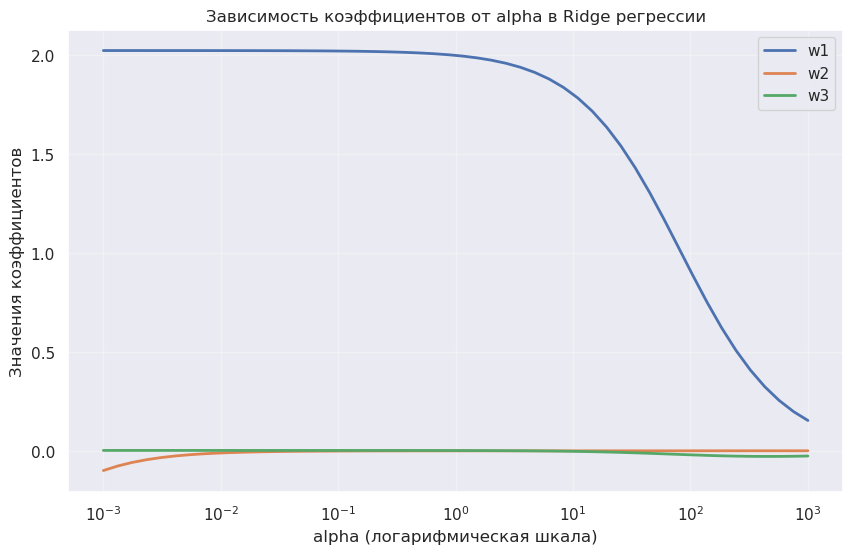

In [9]:
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler

np.random.seed(42)
n_samples = 100

# Признак 1: полезный признак
x1 = np.random.normal(0, 1, n_samples)

# Признак 2: абсолютно бесполезный признак (только шум)
x2 = np.random.normal(0, 0.001, n_samples)  # Очень маленькая дисперсия

# Признак 3: константа (нулевая дисперсия)
x3 = np.ones(n_samples) * 5  # Константный признак

# Целевая переменная зависит ТОЛЬКО от x1
y = 2 * x1 + np.random.normal(0, 0.1, n_samples)

X = np.column_stack([x1, x2, x3])

print("Дисперсии признаков:")
print(f"x1: {np.var(x1):.6f}")
print(f"x2: {np.var(x2):.6f}")
print(f"x3: {np.var(x3):.6f}")

alphas = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

print("\nКоэффициенты при разных alpha:")
for alpha in alphas:
    model = Ridge(alpha=alpha, fit_intercept=False)
    model.fit(X, y)
    print(f"alpha={alpha:6.1f}: w1={model.coef_[0]:7.3f}, w2={model.coef_[1]:10.6f}, w3={model.coef_[2]:10.6f}")


# Визуализируем как меняются веса при увеличении alpha
alphas = np.logspace(-3, 3, 50)
coefs = []

for alpha in alphas:
    model = Ridge(alpha=alpha, fit_intercept=False)
    model.fit(X, y)
    coefs.append(model.coef_)

coefs = np.array(coefs)

plt.figure(figsize=(10, 6))
for i in range(3):
    plt.plot(alphas, coefs[:, i], label=f'w{i+1}', linewidth=2)

plt.xscale('log')
plt.xlabel('alpha (логарифмическая шкала)')
plt.ylabel('Значения коэффициентов')
plt.title('Зависимость коэффициентов от alpha в Ridge регрессии')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

<font color='MediumOrchid'>**Ваши выводы тут:**</font>

### Функция потерь для Ridge имеет вид:
$L(w) = \|y - Xw\|^2 + \alpha\|w\|^2$

### Выпишем условия оптимальности:
$\frac{\partial L}{\partial w_j} = -2X_j^T(y - Xw) + 2\alpha w_j = 0$

Для признака с нулевой дисперсией $(X_j^TX_j = 0)$:
$-2 \cdot 0 \cdot (y - Xw) + 2\alpha w_j = 0$

$2\alpha w_j = 0$

$w_j = 0$

**Таким образом, если признак имеет нулевую дисперсию, Ridge гарантированно занулит его коэффициент!**

**Выводы** В первой части задания по линейным моделям мы должны были узнать:
.

1.   Зачем нужна регуляризация.
2.   Как отбирать значащие признаки.
3.   Когда линейные модели работают хорошо, а когда плохо

-----
<font color="white" style="opacity:0.2025"></font>

Во **второй части** мы будем применять линейные модели для классификации реальных данных, где мы сможем проверить наши выводы, полученные на искуственных примерах. А также убедимся в полезности нормировки и научимся работать с разными видами данных.
